<figure>
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Redes  neuronales modernas para tratamiento de imagenes</center></span>

<center> Modelos pre-entrenados</center>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Referencias</span>

- [Keras Applications](https://keras.io/api/applications/)
- [Deep learning Wiki](https://en.wikipedia.org/wiki/Deep_learning)
- [Deep Learning IBM](https://www.ibm.com/cloud/learn/deep-learning)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Redes Profundas Modernas](#Redes-Profundas-Modernas)
* [Clasificación con Resnet50](#Clasificación-con-Resnet50)
* [Extracción de características con VGG16](#Extracción-de-características-con-VGG16)
* [Extracción de características de una capa intermedia arbitrari con VGG19<o](#Extracción-de-características-de-una-capa-intermedia-arbitraria-VGG19)
* [InceptionV3](#InceptionV3)
* [MobileNetV3](#MobileNetV3)
* [Predicciones usando OpenCV](#Predicciones-usando-OpenCV)

## <span style="color:blue">Introducción</span>

En esta leccion revisamos alguna redes modernas disponibles para usar directamente para predicción, extración de caracterísitcas y ajuste fino. En la lección [Transferencia de conocimiento](tl_transfer_learning.ipynb) veremos como hacer el ajuste fino de modelos basados en estos modelos pre-entrenados. 

[[Volver]](#Contenido)

## <span style="color:blue">Redes Profundas Modernas</span>

Si desea consultar los modelos pre-entrenado disponibles en Keras vaya a [Keras applications](https://keras.io/api/applications/). Estas redes han sido desarrolladas por distintos equipos de investigación. Es común que nuevos modelos se presenten en eventos académicos especializados y que sean entrenados con conjuntos de datos para tal fin como [imagenet](https://image-net.org/), un esfuerzo de la Universidad de Standford, que contiene mas de 14 millones de imagenes, etiquetadadas en 1000 clase. En la tabla disponible en [Keras applications] aparece la exactitud en la predicción de los modelos para el conjunto de validación de imagenet. También la profundidad de la red. Por ejemplo, el  modelo `Xception`pesa 88 MB, tiene un top5 de exactitud de 0.945, 22,910,48 parámetros.


In [1]:
import tensorflow as tf

In [2]:
print(dir(tf.keras.applications))

['ConvNeXtBase', 'ConvNeXtLarge', 'ConvNeXtSmall', 'ConvNeXtTiny', 'ConvNeXtXLarge', 'DenseNet121', 'DenseNet169', 'DenseNet201', 'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2', 'EfficientNetB3', 'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7', 'EfficientNetV2B0', 'EfficientNetV2B1', 'EfficientNetV2B2', 'EfficientNetV2B3', 'EfficientNetV2L', 'EfficientNetV2M', 'EfficientNetV2S', 'InceptionResNetV2', 'InceptionV3', 'MobileNet', 'MobileNetV2', 'MobileNetV3Large', 'MobileNetV3Small', 'NASNetLarge', 'NASNetMobile', 'RegNetX002', 'RegNetX004', 'RegNetX006', 'RegNetX008', 'RegNetX016', 'RegNetX032', 'RegNetX040', 'RegNetX064', 'RegNetX080', 'RegNetX120', 'RegNetX160', 'RegNetX320', 'RegNetY002', 'RegNetY004', 'RegNetY006', 'RegNetY008', 'RegNetY016', 'RegNetY032', 'RegNetY040', 'RegNetY064', 'RegNetY080', 'RegNetY120', 'RegNetY160', 'RegNetY320', 'ResNet101', 'ResNet101V2', 'ResNet152', 'ResNet152V2', 'ResNet50', 'ResNet50V2', 'ResNetRS101', 'ResNetRS152', 'ResNe

## <span style="color:blue">Datos de Prueba</span>

/Users/moury/miniforge3/envs/resnet/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


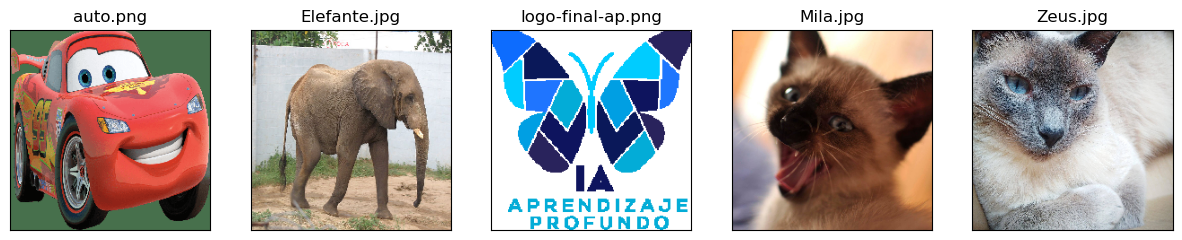

In [1]:
import os
import requests
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# lista de los nombres de la imágenes
path = '../imagenes'
imag = ['auto.png', 'Elefante.jpg', 'logo-final-ap.png', 'Mila.jpg', 'Zeus.jpg']
images = [os.path.join(path, i) for i in imag]

#plt.figure(figsize=(20,20))

fig, axs = plt.subplots(1, 5,figsize=(15,15))
for i in range(len(imag)):
    axs[i].imshow(image.load_img(images[i], target_size=(224, 224)))
    axs[i].set_title(imag[i])
    axs[i].axes.xaxis.set_visible(False)
    axs[i].axes.yaxis.set_visible(False)
plt.show()

[[Volver]](#Contenido)

## <span style="color:blue">VGG16</span>

In [2]:
dir(tf.keras.applications.vgg16)

['VGG16',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'decode_predictions',
 'preprocess_input']

## <span style="color:blue">Cargar Modelo Pre-entrenado </span>

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

model = VGG16(weights='imagenet', include_top=True)

2023-03-15 14:35:44.828020: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-15 14:35:44.828868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


Podemos observar que se ha efectuado una descarga desde internet.

> **El modelo quedará guardado en el directorio** `~/.keras/models/`:

In [4]:
!ls ~/.keras/models

imagenet_class_index.json
inception_v3_weights_tf_dim_ordering_tf_kernels.h5
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224.h5
resnet50_weights_tf_dim_ordering_tf_kernels.h5
vgg16_weights_tf_dim_ordering_tf_kernels.h5
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
vgg19_weights_tf_dim_ordering_tf_kernels.h5
weights_mobilenet_v3_large_224_1.0_float.h5
xception_weights_tf_dim_ordering_tf_kernels_notop.h5


[[Volver]](#Contenido)

## <span style="color:blue">Estructura del Modelo</span>

In [5]:
model.summary()
plot_model(model, to_file='../imagenes/VGG16.png', show_shapes=True)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

[[Volver]](#Contenido)

## <span style="color:blue">Obteniendo Data</span>

In [6]:
import requests

url = "https://www.worldatlas.com/r/w2000-h1125-q90/upload/85/05/e8/african-elephant.jpg"

r = requests.get(url)
with open("../imagenes/african-elephant.jpg", "wb") as f:
    f.write(r.content)

[[Volver]](#Contenido)

## <span style="color:blue">Utilizando el Modelo</span>

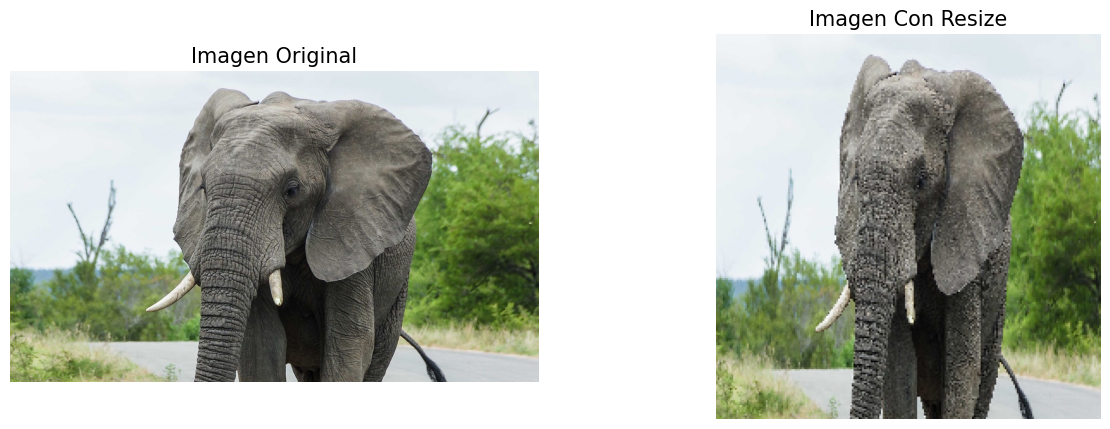

2023-03-15 14:36:35.335299: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-15 14:36:35.486701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 918ms/step


In [7]:
# Ruta de la Imagen
img_path = '../imagenes/african-elephant.jpg'

# Cargar Imagen
img = image.load_img(img_path)

# Visualizar Imagen
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Original",fontsize=15)


# Cargar Imagen con resize (Para la Red)
img = image.load_img(img_path,target_size=(224,224))

# Visualizar Imagen
plt.subplot(122)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Con Resize",fontsize=15)
plt.show()

# Convertir a tensor
x = image.img_to_array(img)
# Expandir dimensión para forma de la red
x = np.expand_dims(x, axis=0)
# Preprocesarmiento del input para ayudar a la red
x = preprocess_input(x)
# Predicciones (Vector de probabilidades)
features = model.predict(x)

[[Volver]](#Contenido)

## <span style="color:blue">Predecir Imagen</span>

In [8]:
clase=np.argmax(features)
print("Número de clase de la imagen predicha",clase,'\n')
que_es=decode_predictions(features)
que_es

Número de clase de la imagen predicha 101 



[[('n01871265', 'tusker', 0.52985275),
  ('n02504458', 'African_elephant', 0.33972266),
  ('n02504013', 'Indian_elephant', 0.13033605),
  ('n02963159', 'cardigan', 1.7900453e-05),
  ('n02437312', 'Arabian_camel', 1.7313065e-05)]]

[[Volver]](#Contenido)

## <span style="color:blue">Extracción de características con VGG16</span>

In [9]:
dir(tf.keras.applications.vgg16)

['VGG16',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'decode_predictions',
 'preprocess_input']

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = images[0]# auto
img = image.load_img(img_path, target_size=(500, 530))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
features.shape

2023-03-15 14:36:44.680952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 254ms/step


(1, 15, 16, 512)

In [11]:
model.summary()
plot_model(model, to_file='../imagenes/VGG16.png', show_shapes=True)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

[[Volver]](#Contenido)

## <span style="color:blue">Extracción de características de una capa intermedia arbitraria con VGG19</span>

In [12]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = images[1]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
block4_pool_features.shape

1/1 [==============================] - 0s 146ms/step


2023-03-15 14:36:54.216737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(1, 14, 14, 512)

[[Volver]](#Contenido)

## <span style="color:blue">InceptionV3</span>

In [13]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input,decode_predictions

In [14]:
IV3 = InceptionV3()

In [ ]:
IV3.summary()

In [16]:
plot_model(IV3, to_file='../imagenes/IV3.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


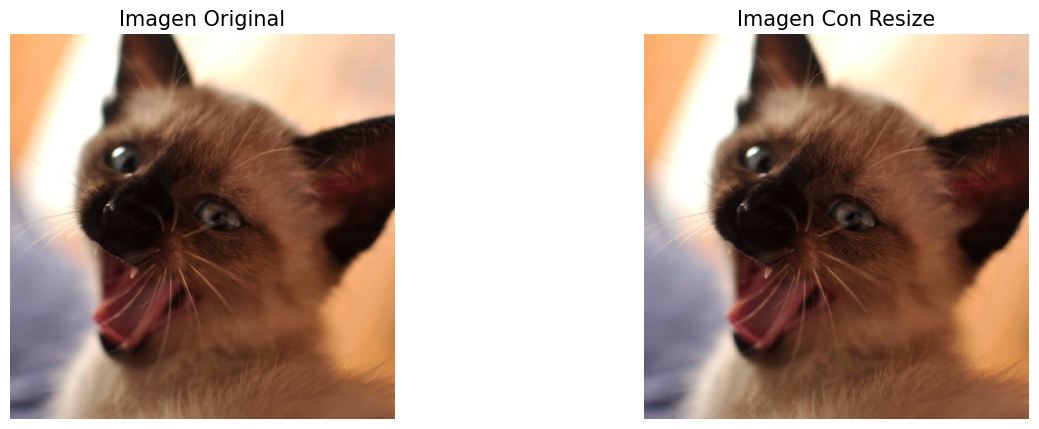

2023-03-15 14:37:12.084302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Número de clase de la imagen predicha 284 



[[('n02123597', 'Siamese_cat', 0.84545666),
  ('n02123394', 'Persian_cat', 0.02051421),
  ('n03325584', 'feather_boa', 0.0069100433),
  ('n03908714', 'pencil_sharpener', 0.0010262966),
  ('n04553703', 'washbasin', 0.0010005322)]]

In [17]:
# Ruta de la Imagen
img_path = '../imagenes/Mila.jpg'

# Cargar Imagen
img = image.load_img(img_path)

# Visualizar Imagen
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Original",fontsize=15)


# Cargar Imagen con resize (Para la Red)
img = image.load_img(img_path,target_size=(299,299))

# Visualizar Imagen
plt.subplot(122)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Con Resize",fontsize=15)
plt.show()

# Convertir a tensor
x = image.img_to_array(img)
# Expandir dimensión para forma de la red
x = np.expand_dims(x, axis=0)
# Preprocesarmiento del input para ayudar a la red
x = preprocess_input(x)
# Predicciones (Vector de probabilidades)
features = IV3.predict(x)
# Número de clase
clase=np.argmax(features)
print("Número de clase de la imagen predicha",clase,'\n')
# Qué objeto es
que_es=decode_predictions(features)
que_es

[[Volver]](#Contenido)

## <span style="color:blue">Resnet50</span>

Como el nombre indica, el modelo tiene 50 capas

###  Librerías

In [18]:
import tensorflow as tf

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.utils import plot_model

### Carga modelo pre-entrenado

In [19]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000)

### Predicciones

In [20]:
# arreglo para cargar las imágenes
x = np.zeros(shape = (len(images), 224, 224, 3), dtype= np.float32)

# carga y preprocesa las imágenes
for i in range(len(images)):
    img = image.load_img(images[i], target_size=(224, 224))
    w = image.img_to_array(img)
    w = np.expand_dims(w, axis=0)
    w = preprocess_input(w)
    x[i] = w

# predicciones
preds = model.predict(x)

print('Predichos:')
for i in range(len(images)):
    print(decode_predictions(preds, top=3)[i])

2023-03-15 14:39:52.074495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Predichos:
[('n03930630', 'pickup', 0.6370842), ('n02974003', 'car_wheel', 0.08398487), ('n03459775', 'grille', 0.046431214)]
[('n02504458', 'African_elephant', 0.8584614), ('n02504013', 'Indian_elephant', 0.10504349), ('n01871265', 'tusker', 0.03603602)]
[('n01773549', 'barn_spider', 0.28439677), ('n04275548', 'spider_web', 0.21936171), ('n06359193', 'web_site', 0.11893765)]
[('n02123597', 'Siamese_cat', 0.9998474), ('n02127052', 'lynx', 9.922224e-05), ('n02124075', 'Egyptian_cat', 2.7349484e-05)]
[('n02123597', 'Siamese_cat', 0.9903976), ('n02127052', 'lynx', 0.0029036684), ('n02497673', 'Madagascar_cat', 0.0024863514)]


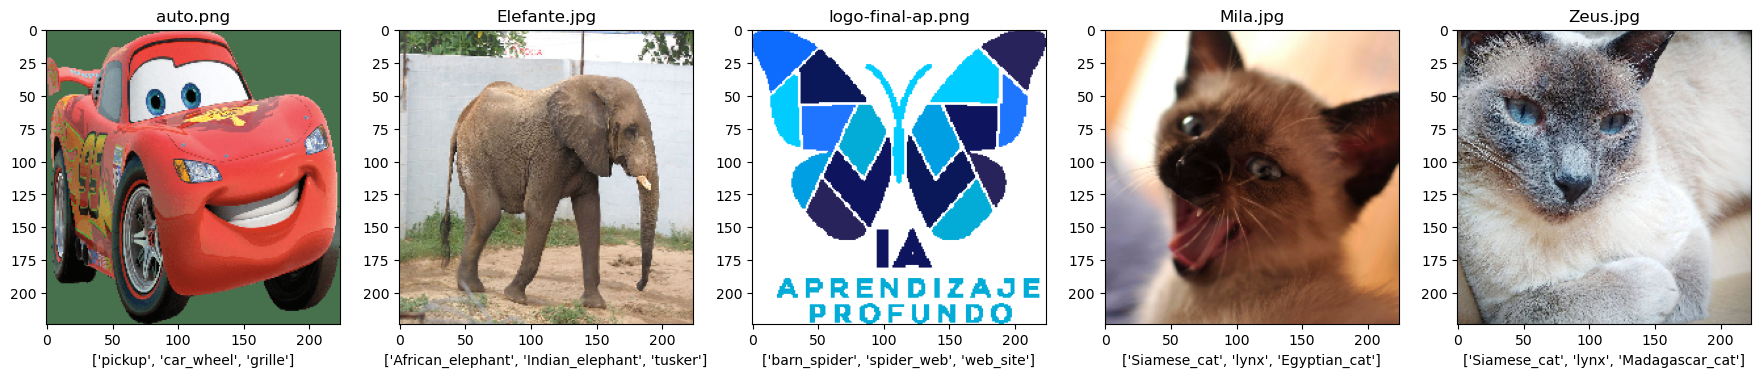

In [21]:
# lista de los nombres de la imágenes
path = '../imagenes'
imag = ['auto.png', 'Elefante.jpg', 'logo-final-ap.png', 'Mila.jpg', 'Zeus.jpg']
images = [os.path.join(path, i) for i in imag]

#plt.figure(figsize=(20,20))
top = 3
fig, axs = plt.subplots(1, 5,figsize=(22,15))
for i in range(len(imag)):
    axs[i].imshow(image.load_img(images[i], target_size=(224, 224)))
    axs[i].set_title(imag[i])
    #axs[i].axes.xaxis.set_visible(False)
    #axs[i].axes.yaxis.set_visible(False)
    axs[i].set_xlabel([decode_predictions(preds, top=top)[i][j][1] for j in range(top)])
    
plt.show()

In [ ]:
model.summary()
plot_model(model, to_file='../imagenes/Resnet50.png', show_shapes=True)

## <span style="color:blue">MobileNetV3</span>

Para entender a profundidad esta red, recomendamos el artículo

[Everything you need to know about MobileNetV3](https://towardsdatascience.com/everything-you-need-to-know-about-mobilenetv3-and-its-comparison-with-previous-versions-a5d5e5a6eeaa)

In [ ]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input, decode_predictions

mnet_v3 = MobileNetV3Large(weights='imagenet', include_top=True,input_shape=(224,224,3))
mnet_v3.summary()
plot_model(mnet_v3, to_file='../imagenes/MobileNetV3L.png', show_shapes=True)

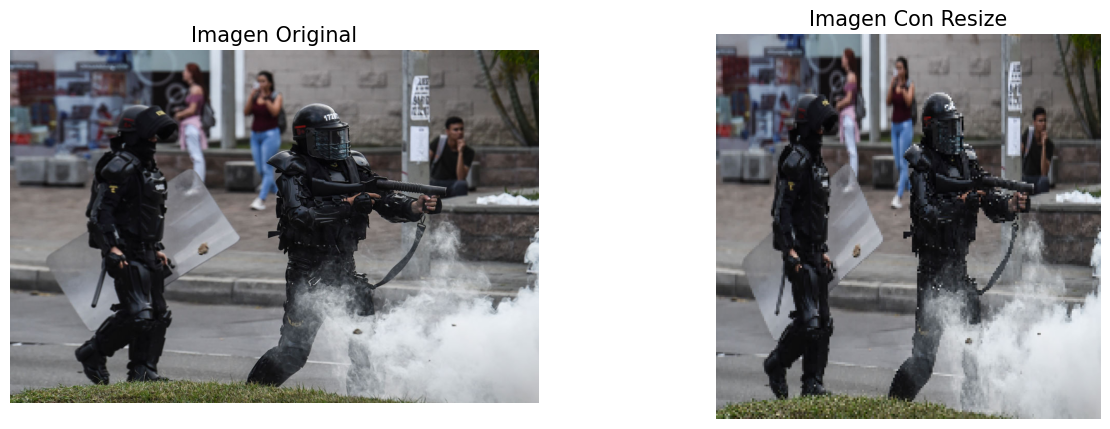

Número de clase de la imagen predicha 413 

Tipo de Dato de Salida: <class 'tensorflow.python.framework.ops.EagerTensor'>


[[('n02749479', 'assault_rifle', 0.15782574),
  ('n02916936', 'bulletproof_vest', 0.10485344),
  ('n03388043', 'fountain', 0.05531952),
  ('n03763968', 'military_uniform', 0.05517868),
  ('n02950826', 'cannon', 0.044713896)]]

In [24]:
# https://media.cnnchile.com/sites/2/2021/05/COLOMBIA.jpg
# https://ggia.berkeley.edu/assets/general/GGIA-HumanFace.jpg
# https://cnnespanol.cnn.com/wp-content/uploads/2021/05/GettyImages-1203559048.jpg?quality=100&strip=info&w=1024

url = "https://cnnespanol.cnn.com/wp-content/uploads/2021/05/GettyImages-1203559048.jpg?quality=100&strip=info&w=1024"

r = requests.get(url)
with open("../imagenes/Patria.jpg", "wb") as f:
    f.write(r.content)

# Ruta de la Imagen
img_path = '../imagenes/Patria.jpg'

# Cargar Imagen
img = image.load_img(img_path)

# Visualizar Imagen
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Original",fontsize=15)


# Cargar Imagen con resize (Para la Red)
img = image.load_img(img_path,target_size=(224,224))

# Visualizar Imagen
plt.subplot(122)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen Con Resize",fontsize=15)
plt.show()

# Convertir a tensor
x = image.img_to_array(img)
# Expandir dimensión para forma de la red
x = np.expand_dims(x, axis=0)
# Preprocesarmiento del input para ayudar a la red
x = preprocess_input(x)
# Predicciones (Vector de probabilidades)
features = mnet_v3(x)
# Número de clase
clase=np.argmax(features)
print("Número de clase de la imagen predicha",clase,'\n')
# Tipo de datos de salida
print("Tipo de Dato de Salida:",type(features))
# Qué objeto es (note la diferencia con los otrso modelos)
que_es=decode_predictions(np.array(features))
que_es

[[Volver]](#Contenido)

[[Volver]](#Contenido)

## <span style="color:blue">Predicciones usando OpenCV</span>

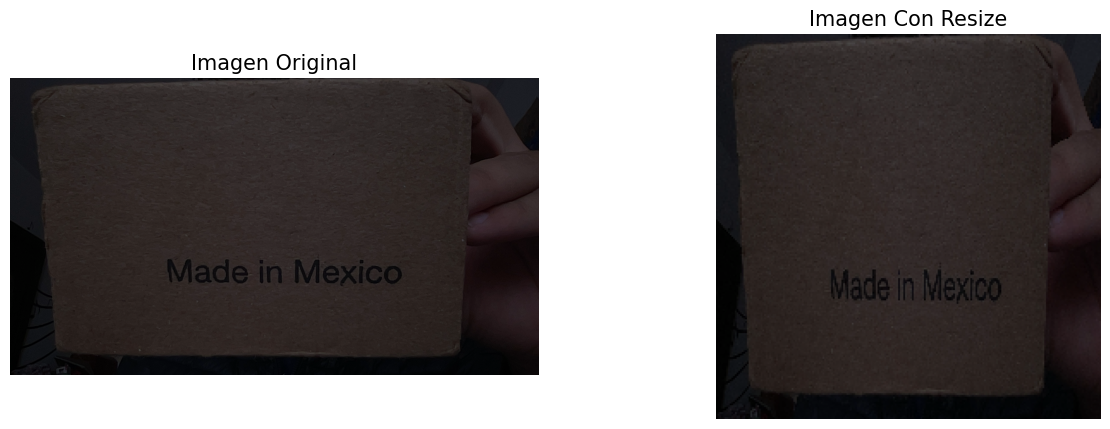

Número de clase de la imagen predicha 478 



[[('n02971356', 'carton', 0.7333034),
  ('n07248320', 'book_jacket', 0.10337009),
  ('n03871628', 'packet', 0.05552434),
  ('n03291819', 'envelope', 0.015446687),
  ('n03223299', 'doormat', 0.010730569)]]

In [36]:
import cv2

video_capture = cv2.VideoCapture(0)
# Check success
if not video_capture.isOpened():
    raise Exception("No se pudo abrir el dispositivo de video")
# Read picture. ret === True on success
ret, frame = video_capture.read()
# Close device
video_capture.release()

frameRGB = frame[:,:,::-1] # BGR => RGB
x = cv2.resize(frameRGB,(224,224))

# Visualizar Imagen
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(frameRGB)
plt.axis('off')
plt.title("Imagen Original",fontsize=15)

# Visualizar Imagen
plt.subplot(122)
plt.imshow(x)
plt.axis('off')
plt.title("Imagen Con Resize",fontsize=15)
plt.show()

# Reescalar la imagen

x = np.expand_dims(x, axis=0)
# Preprocesarmiento del input para ayudar a la red
x = preprocess_input(x)
# Predicciones (Vector de probabilidades)
features = mnet_v3(x)
# Número de clase
clase=np.argmax(features)
print("Número de clase de la imagen predicha",clase,'\n')
# Qué objeto es (note la diferencia con los otrso modelos)
que_es=decode_predictions(np.array(features))
que_es

Todo esto funciona súper bien, pero...

¿Y si quisiéramos hacer una aplicación que se especialice en nuestros propios datos?

¿Qué tal modificar algunas capas de la red y con base en ella entrenar sólo algunos parámetros?

En el siguiente Notebook, se podrán responder estas y más preguntas, bienvenidos a **Transfer Learning**.

[[Volver]](#Contenido)

## <span style="color:blue">Otras Redes que hacen uso del procesamiento de imágenes</span>

- [Tesseract (OCR)](https://nanonets.com/blog/ocr-with-tesseract/)
- [Building a Complete OCR Engine From Scratch In Python](https://medium.com/geekculture/building-a-complete-ocr-engine-from-scratch-in-python-be1fd184753b)
- [Detección y Reconocimiento Facial](https://nbviewer.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/M%C3%B3dulo%207-%20Aprendizaje%20Profundo%20I/2.%20Redes%20profundas/tl_deteccion_reconocimiento_facial.ipynb)
- [DALLE-2]()